In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters


In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ['date'], index_col = 'date')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [3]:
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
# how to get the value top 2.5 and bottom 2.5?
    # quantile() method
df.max()
top_remove = df['value'].quantile(0.975)
bottome_remove = df['value'].quantile(0.025)

cleaned = df[
    (df['value']<= top_remove) &
    (df['value']>= bottome_remove)]
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1238 non-null   int64
dtypes: int64(1)
memory usage: 19.3 KB


Text(0, 0.5, 'Page Views')

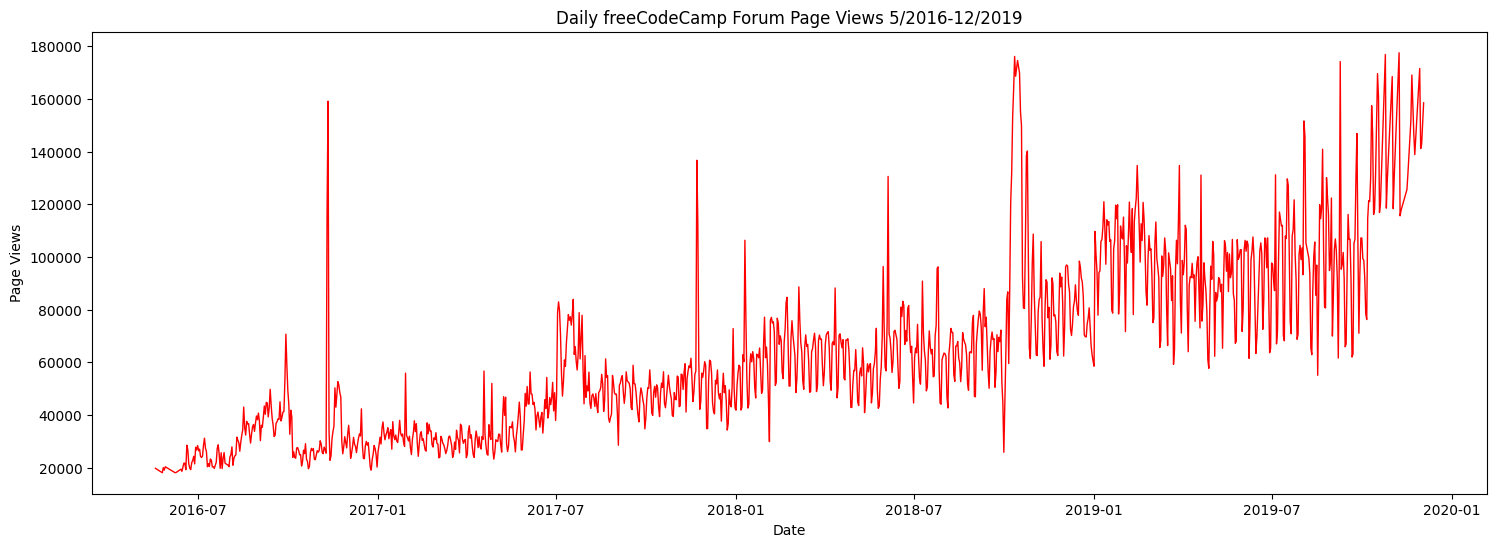

In [4]:
# Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". 
# The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. 
# The label on the x axis should be Date and the label on the y axis should be Page Views.

fig, ax = plt.subplots(figsize= (18, 6))
ax.plot(cleaned.index, cleaned['value'], color= 'red', linewidth = 1)
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')



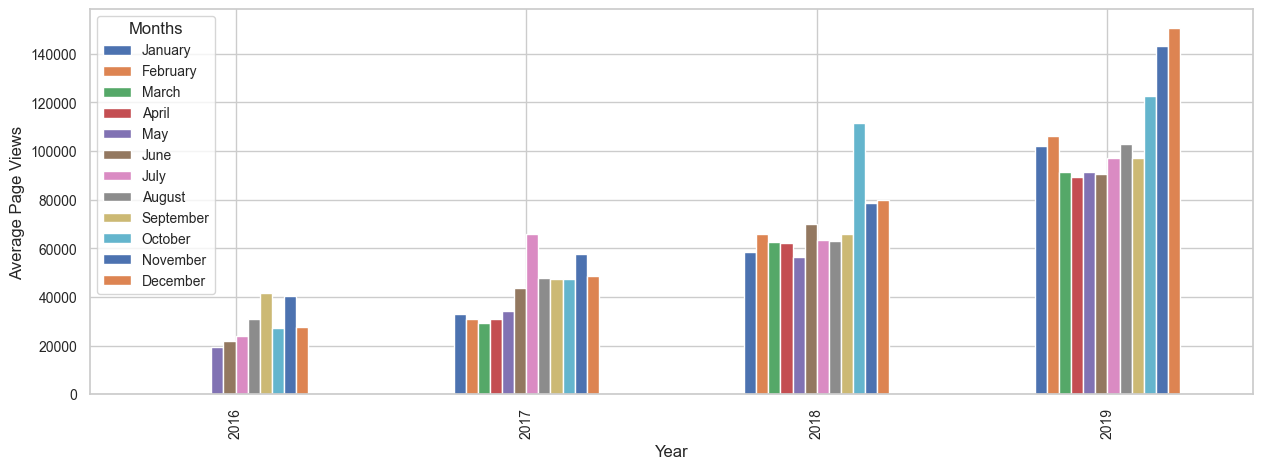

In [14]:
# Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". 
# It should show average daily page views for each month grouped by year. 
# The legend should show month labels and have a title of Months.
# On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

# 1. make a dataframe about average page view grouped by year and month.
    # use dt.year and dt.month -> this is for a normal column, not for the index column
    # use pd.Datetimeindex(df) -> no, doesn't work
    # use this df.loc[:, 'month'] = df.index.month for exmaple.

df_bar = cleaned
df_bar.index = pd.to_datetime(df_bar.index)
df_bar.loc[:,'month'] = df_bar.index.month
df_bar.loc[:,'year'] = df_bar.index.year 
df_bar = df_bar.pivot_table(index = 'year', columns = 'month', values='value', aggfunc='mean')


# 2. create a bar chart using df_bar
# can you use fig, ax variable multiple times not in the different function? maybe yes, lets see.
fig, ax = plt.subplots(figsize= (15, 5))
df_bar.plot(kind ="bar", legend = True, ax=ax)

# 3. add titles and legends
ax.set_ylabel('Average Page Views')
ax.set_xlabel('Year')

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(fontsize = 10, title="Months", labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framew

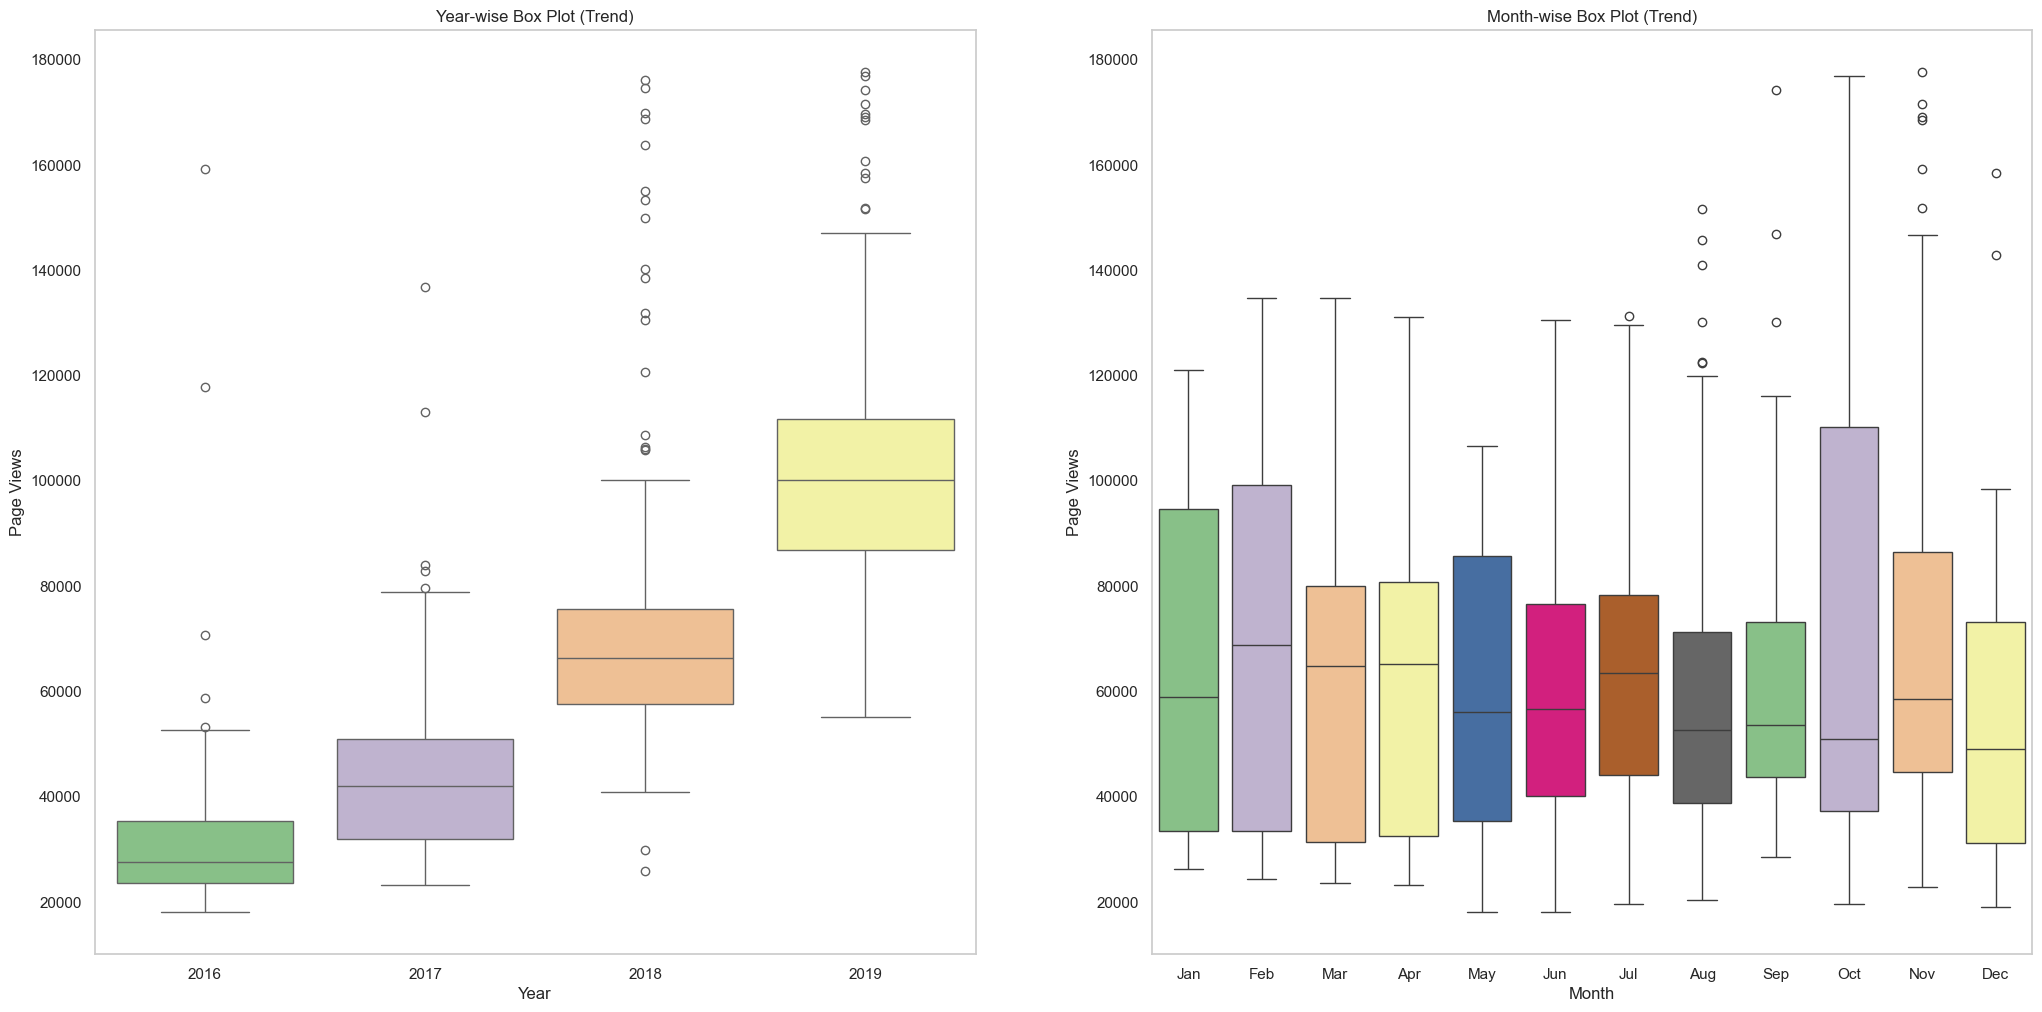

In [18]:
# Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". 
# These box plots should show how the values are distributed within a given year or month and how it compares over time. 
# The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). 
# Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.


df_box = cleaned.copy()
df_box.reset_index(inplace = True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [data.strftime('%b') for data in df_box.date]
df_box['month_num'] = df_box['date'].dt.month
df_box.sort_values('month_num', inplace = True)



sns.set(style="whitegrid")
fig, axes = plt.subplots(1,2, figsize= (25, 12))
sns.boxplot(x='year', y='value', data=df_box, ax=axes[0], palette = 'Accent', hue = 'year', legend = False)
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_ylabel('Page Views')
axes[0].set_xlabel('Year')
axes[0].grid(False)

sns.boxplot(x='month', y='value', data=df_box, ax=axes[1], palette = 'Accent',  hue = 'month', legend = False)
axes[1].set_title('Month-wise Box Plot (Trend)')
axes[1].set_ylabel('Page Views')
axes[1].set_xlabel('Month')
axes[1].grid(False)

plt.show()

